# MAC 5768 - Projeto EP - Parte 1 




#### Integrantes do grupo:
- Ysabelle Pinheiro de Sousa - ysabellesousa@gmail.com - 11341314
- Roberto Gaui - rgaui@yahoo.com.br - 1851224
- Joaquin Lorenzo Pereira Condori - joaquin.condori@usp.br - 11857963


####  Link para repositório projeto: 

https://github.com/YsabelleSousa/mac_5768_ep_visao_proc_imagens

#### Instrução para download dos dados:

Link: https://drive.google.com/file/d/10zncW_BxhBd2x0CpuddXFffeBKK05HAI/view?usp=sharing

**1)** Gerar o link compartilhável da pasta zipada no google drive e atribuir a permissão de leitura para **"Qualquer pessoa com o link"**

**2)** Atribuir o ID que está no link compartilhável à variável **"id_google_drive"** na seção **"Baixando Dados"**

**3)** Escolher o path de destino e atribuir à variável **"path_destination"** na seção **"Baixando Dados"**

**4)** Executar a função **"download_file_from_google_drive"**


## Importando Bibliotecas

In [1]:
import pandas as pd
from utils import utils
from google_drive_downloader import GoogleDriveDownloader as gdd
from PIL import Image

import os
import sys

## Baixando Dados

In [2]:
id_google_drive = '10zncW_BxhBd2x0CpuddXFffeBKK05HAI'
path_destination = 'data/EP1.zip'

In [14]:
gdd.download_file_from_google_drive(file_id = id_google_drive,
                                    dest_path = path_destination,
                                    unzip = True,
                                    showsize = True,
                                    overwrite=False)

## Extraindo informações para DF

Nesta seção, lemos as imagens em seu diretório e extraímos as informações do seu metadados (nome da imagem) para atribuir em um dataframe que será consumido nas próximas seções.

In [3]:
df_dados = pd.DataFrame(columns = ['classe','num_objeto','tp_fundo','dia_noite','dentro_fora','num_repeticao','extensao'])

In [4]:
#Extraindo informações dos metadados e atribuindo à um dataframe
for root, subdirs, files in os.walk(os.path.abspath('data/EP1_V2_DRIVE')):
    
    for file in files:
        if file.count('_') == 5:
            df_dados = df_dados.append({
            
                        'classe': file.split('_')[0],
                        'num_objeto': file.split('_')[1],
                        'tp_fundo': file.split('_')[2],
                        'dia_noite': file.split('_')[3],
                        'dentro_fora': file.split('_')[4],
                        'num_repeticao': file.split('_')[5].split('.')[0],
                        'extensao': file.split('_')[5].split('.')[1],
                        'resolucao': Image.open(root + '/' + file).size
            }, ignore_index=True)
            

In [5]:
df_dados

,classe,num_objeto,tp_fundo,dia_noite,dentro_fora,num_repeticao,extensao,resolucao
0,camiseta,1,neutro,noite,dentro,2,JPG,"(4608, 3456)"
1,camiseta,1,azul,noite,dentro,2,JPG,"(4608, 3456)"
2,camiseta,3,neutro,dia,fora,2,JPG,"(4608, 3456)"
3,camiseta,2,amarelo,noite,fora,3,JPG,"(4608, 3456)"
4,camiseta,3,neutro,dia,fora,3,JPG,"(4608, 3456)"
...,...,...,...,...,...,...,...,...
599,caneta,1,neutro,noite,dentro,3,JPG,"(4608, 3456)"
600,caneta,2,amarelo,dia,fora,2,JPG,"(4608, 3456)"
601,caneta,2,amarelo,dia,fora,3,JPG,"(4608, 3456)"
602,caneta,1,neutro,noite,dentro,2,JPG,"(4608, 3456)"


## Tabela Sumária Global

Nesta seção, sumarizamos algumas informações das imagens para possibilitar uma visualização mais genérica dos dados.

In [6]:
df_tbl_sumaria = pd.DataFrame(columns=['num_classes','num_imagens','tamanho_base_mb','extensoes_imagens'])                      

In [7]:
df_tbl_sumaria = df_tbl_sumaria.append({
    'num_classes': df_dados['classe'].nunique(),
    'num_imagens': len(df_dados),
    'tamanho_base_mb': utils.return_folder_size_mb('data/'),
    'extensoes_imagens': df_dados['extensao'].str.lower().unique()
}, ignore_index=True)

In [8]:
df_tbl_sumaria

,num_classes,num_imagens,tamanho_base_mb,extensoes_imagens
0,10,604,2148.17,[jpg]


## Tabela Sumária Detalhada

Já nesta seção, as informações apresentadas são mais detalhadas em cada classe de objetos captadas.

In [9]:
df_tbl_sumaria_detalhada = df_dados.groupby('classe', as_index=False).agg({
    'num_objeto': pd.Series.nunique,
    'tp_fundo': lambda x: dict(x.value_counts()),
    'dia_noite': lambda x: dict(x.value_counts()),
    'dentro_fora': lambda x: dict(x.value_counts()),
    'num_repeticao': 'nunique',
    'resolucao': 'unique',
    'extensao': 'count'
})

In [11]:
df_tbl_sumaria_detalhada.columns = ['classe','qtd_objetos','variacoes_fundo','variacoes_iluminacao_externa','variacoes_iluminacao_local','qtd_repeticoes','resolucoes','total_amostras']

In [12]:
df_tbl_sumaria_detalhada

,classe,qtd_objetos,variacoes_fundo,variacoes_iluminacao_externa,variacoes_iluminacao_local,qtd_repeticoes,resolucoes,total_amostras
0,camiseta,3,"{'azul': 27, 'amarelo': 26, 'neutro': 21}","{'noite': 54, 'dia': 20}","{'fora': 47, 'dentro': 27}",3,"[(4608, 3456)]",74
1,caneca,3,"{'azul': 23, 'branco': 15, 'laranja': 13}","{'dia': 28, 'noite': 23}","{'fora': 28, 'dentro': 23}",3,"[(4032, 3024), (3024, 4032)]",51
2,caneta,3,"{'amarelo': 36, 'azul': 35, 'neutro': 27}","{'noite': 54, 'dia': 44}","{'fora': 52, 'dentro': 46}",3,"[(4608, 3456)]",98
3,celular,3,"{'laranja': 13, 'azul': 7, 'branco': 7}","{'noite': 16, 'dia': 11}","{'fora': 16, 'dentro': 11}",3,"[(4032, 3024), (3024, 4032)]",27
4,colher,3,"{'azul': 18, 'laranja': 17, 'branco': 15}","{'dia': 29, 'noite': 21}","{'fora': 26, 'dentro': 24}",3,"[(3024, 4032), (4032, 3024)]",50
5,copo,4,"{'branco': 27, 'verde': 24, 'azul': 22}","{'noite': 70, 'dia': 3}","{'dentro': 37, 'fora': 36}",3,"[(4160, 3120), (3120, 4160)]",73
6,flauta,3,"{'verde': 36, 'branco': 17, 'azul': 9}","{'noite': 36, 'dia': 26}","{'fora': 44, 'dentro': 18}",3,"[(4160, 3120), (3120, 4160)]",62
7,garfo,3,"{'azul': 18, 'verde': 17, 'branco': 14}",{'noite': 49},"{'fora': 27, 'dentro': 22}",3,"[(4160, 3120), (3120, 4160)]",49
8,livro,3,"{'azul': 26, 'amarelo': 26, 'neutro': 20}","{'noite': 52, 'dia': 20}","{'fora': 47, 'dentro': 25}",3,"[(4608, 3456)]",72
9,tenis,3,"{'azul': 17, 'verde': 17, 'branco': 14}",{'noite': 48},"{'fora': 27, 'dentro': 21}",3,"[(4160, 3120), (3120, 4160)]",48


## Plotando Imagens

Aqui, geramos um sample de imagens randômicas da base com uma visuzalição MNIST-like 

100%|██████████| 9/9 [00:28<00:00,  3.13s/it]


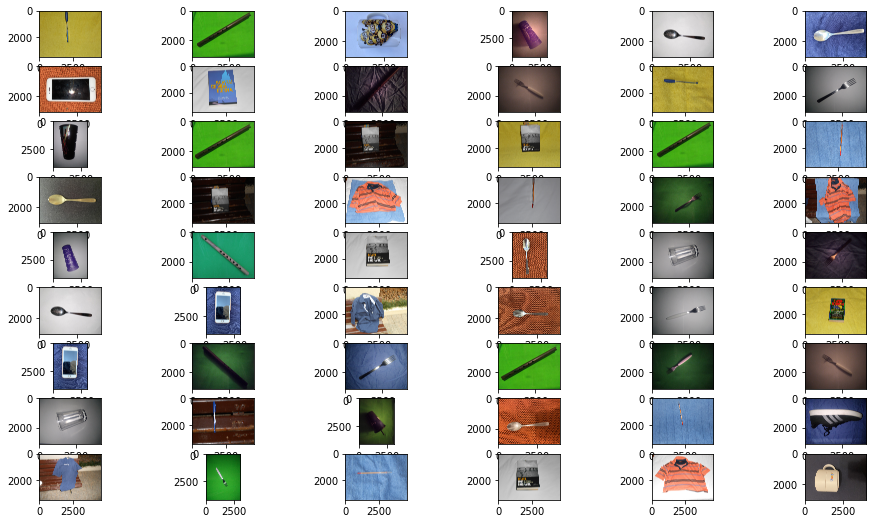

In [13]:
utils.plot_images('data/EP1_V2_DRIVE')